In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

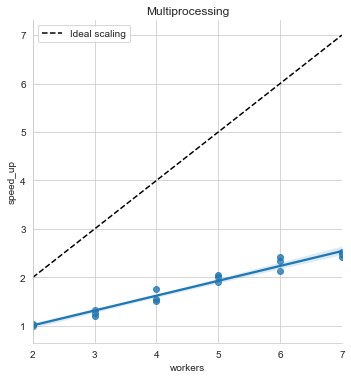

Ideal scaling has gradient 1. Observed scaling: 0.306545


In [7]:
df = pd.read_csv("mp_check.csv", index_col=0)
df["speed_up"] = df.throughput_rays_per_sec.values/df.throughput_rays_per_sec.values[0]
sns.set_style("whitegrid")
sns.lmplot(x="workers", y="speed_up", data=df)
x = np.arange(np.min(df.workers), np.max(df.workers)+1)
plt.plot(x, x, "k--", label="Ideal scaling")
plt.legend()
plt.title("Multiprocessing")
plt.show()
m, c = np.polyfit(df.workers.values, df.speed_up.values, 1)
print(f"Ideal scaling has gradient 1. Observed scaling: {m:f}")

In [5]:
df_ave = df.groupby("workers").mean()
df_ave = df_ave.drop(columns="rep")
df_ave

,secs_per_1000_rays,throughput_rays_per_sec,thrown,took,speed_up
workers,,,,,
2.0,25.338812,39.478347,5000.0,126.694060,1.023412
3.0,20.508218,48.832341,5000.0,102.541092,1.265899
4.0,16.166024,62.099487,5000.0,80.830120,1.609829
5.0,13.082948,76.499310,5000.0,65.414740,1.983121
6.0,11.291322,88.822466,5000.0,56.456608,2.302579
7.0,10.487680,95.379459,5000.0,52.438401,2.472558
